<a href="https://colab.research.google.com/github/krovyakov12/Feature-Engineering/blob/master/1_Type_of_Variables.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt

In [2]:
use_cols = ['loan_amnt', 'int_rate', 'annual_inc', 'open_acc', 'loan_status',  'open_il_12m']

In [3]:
data = pd.read_csv('lending_club_loans.csv', skiprows=0, header=1, usecols = use_cols).sample(10000, random_state = 5)
data.head()

,loan_amnt,int_rate,annual_inc,loan_status,open_acc,open_il_12m
33840,4750.0,16.70%,31200.0,Charged Off,20.0,NaN
1545,7500.0,7.90%,42500.0,Fully Paid,3.0,NaN
19328,10800.0,12.68%,52000.0,Fully Paid,8.0,NaN
2214,14000.0,12.69%,62000.0,Fully Paid,8.0,NaN
19151,13000.0,10.74%,31000.0,Charged Off,3.0,NaN


# Непрерывные переменные (Continous Variables)

In [4]:
# посмотрим на переменную loan_amnt
data['loan_amnt'].unique()[:10]

array([ 4750.,  7500., 10800., 14000., 13000.,  2000., 11500., 19600.,
        8000.,  1500.])

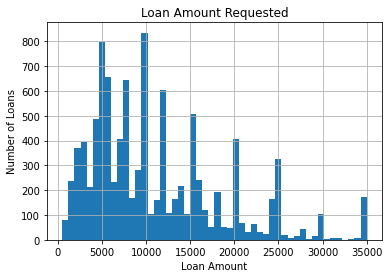

In [5]:
# создадим гистограмму
fig = data['loan_amnt'].hist(bins = 50)

fig.set_title('Loan Amount Requested')
fig.set_xlabel('Loan Amount')
fig.set_ylabel('Number of Loans');

Вывод: значения ссуд для заемщиков варьируются в широком диапазоне, что характерно для непрерывных переменных. На графике выские столбцы соответстветствуют самым популярным суммам ссуд 10000, 15000, 20000, 35000, которые по-видимому предоставляются компанией-кредитором по умолчанию. Менее частые суммы запрашивются людьми под определенные цели.

In [6]:
# посмотрим на переменную int_rate
data['int_rate'].unique()[:10]

array([' 16.70%', '  7.90%', ' 12.68%', ' 12.69%', ' 10.74%', '  7.51%',
       ' 11.99%', ' 12.42%', ' 11.86%', ' 12.84%'], dtype=object)

In [7]:
data['int_rate'] = data['int_rate'].str.replace('%','').astype(float)

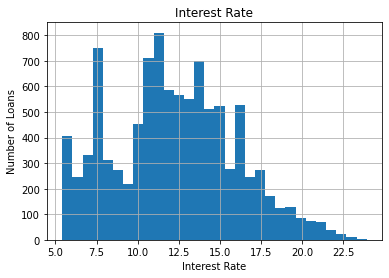

In [8]:
# создадим гистограмму
fig = data['int_rate'].hist(bins = 30)

fig.set_title('Interest Rate')
fig.set_xlabel('Interest Rate')
fig.set_ylabel('Number of Loans');

Вывод: значения процентной ставки непрерывно меняются в рассматрвиаемом диапазоне значений.  

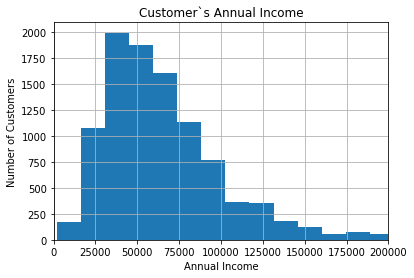

In [9]:
# посмотрим на переменную annual_inc
fig = data['annual_inc'].hist(bins = 100)

fig.set_xlim(0, 200000)

fig.set_title('Customer`s Annual Income')
fig.set_xlabel('Annual Income')
fig.set_ylabel('Number of Customers');

Вывод: основная масса указанных заемщиками размеров дохода варьируется от 30 до 70К. При этом лишь небольшая часть заемщиков зарабатывает гораздо больше. Значения переменной изменяются в рассматриваемом диапазоне, поскольку мы имеем дело с непрерывной переменной.

# Дискретные переменные (Discrete Variables)

In [10]:
# посмотрим на переменную open_acc	
data['open_acc'].dropna().unique()

array([20.,  3.,  8., 14., 24.,  6., 10.,  5., 17.,  7.,  4.,  9., 26.,
       13., 11., 16., 12., 15.,  2., 19., 18., 21., 35., 27., 23., 30.,
        1., 37., 31., 22., 29., 28., 25., 42., 32., 34., 33., 36.])

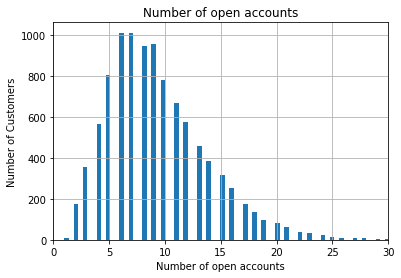

In [11]:
# создадаим гистограмму
fig = data['open_acc'].hist(bins = 100)

fig.set_xlim(0, 30)

fig.set_title('Number of open accounts')
fig.set_xlabel('Number of open accounts')
fig.set_ylabel('Number of Customers');

Вывод: гистограммы дискретных переменных имеют пропуски, т.к. не все значения вутри рассматриваемого интервала представлены в значениях переменной. Например, отсутствуют дробные значения. 

#Частный случай дискретных переменных - бинарные переменные

In [12]:
# посмотрим на переменную loan_status
data['loan_status'].unique()

array(['Charged Off', 'Fully Paid', 'Current',
       'Does not meet the credit policy. Status:Charged Off',
       'Does not meet the credit policy. Status:Fully Paid',
       'In Grace Period', 'Late (31-120 days)', 'Late (16-30 days)'],
      dtype=object)

In [13]:
# создадим бинарную переменную из категории charged off
data['charged_off'] = np.where(data['loan_status'].isin(['Charged Off']),1,0)
# найдем долю клиентов со списанной ссудой
data['charged_off'].mean()

0.1337

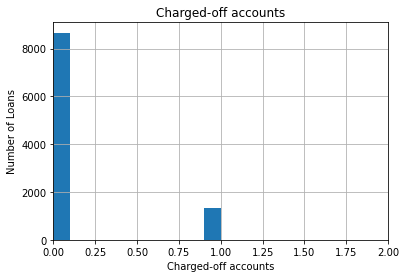

In [14]:
# создадим гистограмму 
fig = data['charged_off'].hist()

fig.set_xlim(0, 2)

fig.set_title('Charged-off accounts')
fig.set_xlabel('Charged-off accounts')
fig.set_ylabel('Number of Loans');

Вывод: переменная содержит только 2 значения 0 (долг не списан) и 1 (долг списан).

# Категориальные переменные (Categorical Variables)

In [15]:
use_cols = ['id', 'purpose', 'loan_status', 'home_ownership']

In [16]:
data = pd.read_csv('lending_club_loans.csv', skiprows=0, header=1, usecols = use_cols).sample(10000, random_state = 5)
data.head()

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2718: DtypeWarning: Columns (0) have mixed types.Specify dtype option on import or set low_memory=False.
  interactivity=interactivity, compiler=compiler, result=result)


,id,home_ownership,loan_status,purpose
33840,462318,MORTGAGE,Charged Off,small_business
1545,1048862,RENT,Fully Paid,major_purchase
19328,678561,MORTGAGE,Fully Paid,debt_consolidation
2214,1038931,RENT,Fully Paid,debt_consolidation
19151,679022,MORTGAGE,Charged Off,house


In [17]:
# посмотрим на переменнеую home_ownership
data['home_ownership'].unique()

array(['MORTGAGE', 'RENT', 'OWN', 'NONE', 'OTHER'], dtype=object)

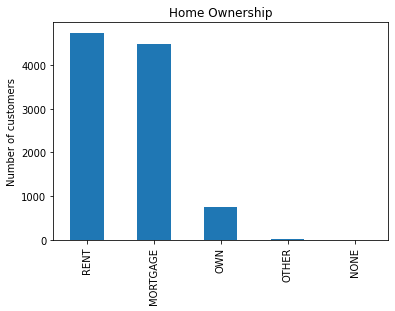

In [18]:
# создадим столбчатую диаграмму
fig = data['home_ownership'].value_counts().plot(kind = 'bar')

fig.set_title('Home Ownership')
fig.set_ylabel('Number of customers');

Вывод: у большинства заемщиков недвижимость в ипотеке или в аренде. Лишь небольшая часть заемщиков имеет недвижимость в собственности.

In [19]:
# посмотрим еще раз на данные
data['home_ownership'].value_counts()

RENT        4740
MORTGAGE    4477
OWN          751
OTHER         27
NONE           5
Name: home_ownership, dtype: int64

Вывод: 27 заемщиков указывают прочий вариант владения недвижимостью, и еще 5 человек на отсутствие владения недвижимостью, например, они могут жить у родственников или родителей.

In [20]:
# посмотрим на переменнеую purpose

data['purpose'].unique()

array(['small_business', 'major_purchase', 'debt_consolidation', 'house',
       'other', 'credit_card', 'medical', 'wedding', 'educational',
       'vacation', 'car', 'home_improvement', 'moving',
       'renewable_energy'], dtype=object)

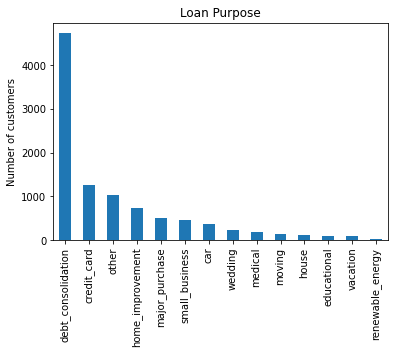

In [21]:
# создадим столбчатую диаграмму
fig = data['purpose'].value_counts().plot(kind = 'bar')

fig.set_title('Loan Purpose')
fig.set_ylabel('Number of customers');

Вывод: большинству заемщиков займы требуются на рефинансирование долга по другим займам, а также на погашение задолженностей по кредитным картам. Это наиболее частая цель обращения в компанию Lending Club: консолидировать отдельные задолженности в задолженность по одному займу. Такие займы, как правило, предоставляют больше преимуществ заемщикам, поскольку подразумевают более низкий процент, чем процент по кредитной карте, или более продолжительный период погашения основного долга.

In [23]:
# посмотрим на переменнеую loan_status

data['loan_status'].unique()

array(['Charged Off', 'Fully Paid', 'Current',
       'Does not meet the credit policy. Status:Charged Off',
       'Does not meet the credit policy. Status:Fully Paid',
       'In Grace Period', 'Late (31-120 days)', 'Late (16-30 days)'],
      dtype=object)

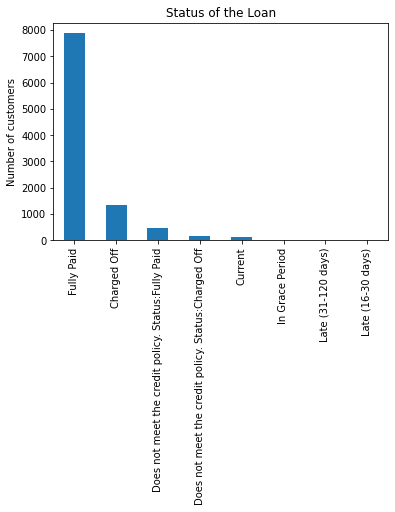

In [24]:
# создадим столбчатую диаграмму
fig = data['loan_status'].value_counts().plot(kind = 'bar')

fig.set_title('Status of the Loan')
fig.set_ylabel('Number of customers');

Вывод: статус погашения большинства займов - "полностью оплачен". Также есть немалое количество платежей со статусом "списан". Это означет, что у компании нет возможности взыскать задолженность по этому займу, деньги потеряны.

In [25]:
# посмотрим на переменнеую id

data['id'].head()

33840     462318
1545     1048862
19328     678561
2214     1038931
19151     679022
Name: id, dtype: object

Вывод: переменная id служит для идентификации заемщика, обеспечивая конфиденциальность и защиту данных.

In [27]:
 # кол-во уникальных заемщиков
 len(data['id'].unique())

10000

# Переменные дат и времени

In [28]:
use_cols = ['loan_amnt', 'grade', 'purpose', 'issue_d', 'last_pymnt_d']

In [29]:
data = pd.read_csv('lending_club_loans.csv', skiprows=0, header=1, usecols = use_cols).sample(10000, random_state = 5)
data.head()

,loan_amnt,grade,issue_d,purpose,last_pymnt_d
33840,4750.0,E,Dec-2009,small_business,Dec-2011
1545,7500.0,A,Dec-2011,major_purchase,Jul-2012
19328,10800.0,C,Feb-2011,debt_consolidation,Mar-2016
2214,14000.0,B,Nov-2011,debt_consolidation,Jun-2013
19151,13000.0,B,Feb-2011,house,Aug-2012


In [30]:
# pandas по умолчанию присвает переменным дат и времени тип строковые
data.dtypes

loan_amnt       float64
grade            object
issue_d          object
purpose          object
last_pymnt_d     object
dtype: object

In [32]:
# сделаем парсинг дат, чтобы их можно было анализировать
data['issue_dt'] = pd.to_datetime(data['issue_d'])
data['last_pymnt_dt'] = pd.to_datetime(data['last_pymnt_d'])

data[['issue_d', 'issue_dt', 'last_pymnt_d', 'last_pymnt_dt']].head()

,issue_d,issue_dt,last_pymnt_d,last_pymnt_dt
33840,Dec-2009,2009-12-01,Dec-2011,2011-12-01
1545,Dec-2011,2011-12-01,Jul-2012,2012-07-01
19328,Feb-2011,2011-02-01,Mar-2016,2016-03-01
2214,Nov-2011,2011-11-01,Jun-2013,2013-06-01
19151,Feb-2011,2011-02-01,Aug-2012,2012-08-01


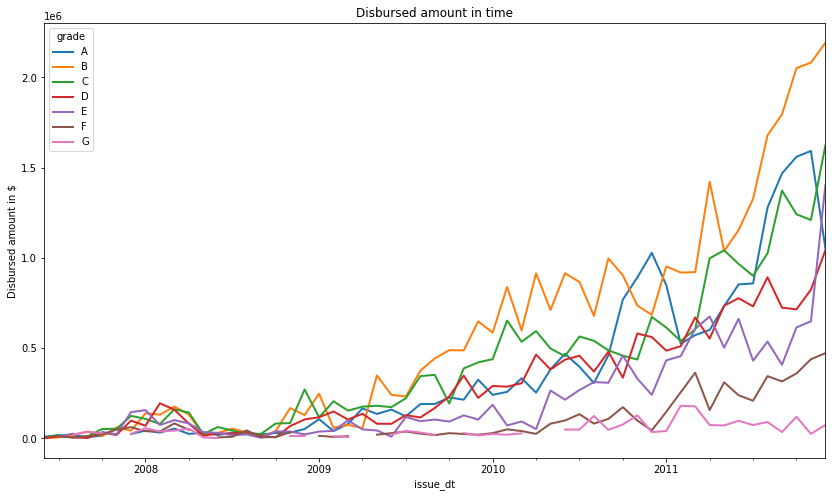

In [33]:
# посмотрим, сколько денег выделил (одолжил) Lending Club на различных рисковых рынках (переменная grade)
fig = data.groupby(['issue_dt','grade'])['loan_amnt'].sum().unstack().plot(
    figsize = (14,8), linewidth = 2)

fig.set_title('Disbursed amount in time')
fig.set_ylabel('Disbursed amount in $');

Вывод: Lending Ckub увеличил объем займов в период с 2009 по 2012 гг. Тенденция указывает на дальнейший рост объемов выдаваемых займов. Средства направляются в сегменты риска B, A и C.

Здесь сегмент A представлен заемщиками с низкой вероятностью риска, с хорошей финансовой ситуацией. Твакие заемщики получают низкие процентные ставки.

Сегменты E,F,G представлены более рисковыми заемщиками, у которых хуже финансовая ситуация или которые имеют недостаточную кредитную историю для оценки кредитоспособности. Часто займы им выдаются под высокие проценты, а инвесторы несут высокие риски, выдавая им займы.

# Переменные смешанных типов

In [34]:
data = pd.read_csv('5.1 sample_s2.csv.csv')
data.head()

,id,open_il_24m
0,1077501,C
1,1077430,A
2,1077175,A
3,1076863,A
4,1075358,A


In [35]:
data.shape

(887379, 2)

In [36]:
# Переменная содержит кодировку следующих событий:
# 'A': невозможно идентифицировать заявителя
# 'B': нет данных
# 'C': заявитель не имеет кредитных счетов

data['open_il_24m'].unique()

array(['C', 'A', 'B', '0.0', '1.0', '2.0', '4.0', '3.0', '6.0', '5.0',
       '9.0', '7.0', '8.0', '13.0', '10.0', '19.0', '11.0', '12.0',
       '14.0', '15.0'], dtype=object)

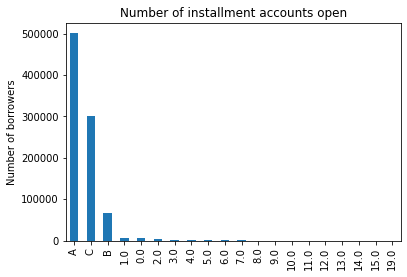

In [37]:
# создадим столбчатую диаграмму
fig = data['open_il_24m'].value_counts().plot(kind = 'bar')

fig.set_title('Number of installment accounts open')
fig.set_ylabel('Number of borrowers');